In [69]:
sys.path.insert(0, '/home/matt/code/lab3/lab3/analysis')
from spatial.spatial_tuning import SimpleSpatialTuning

ModuleNotFoundError: No module named 'lab3'

In [168]:
signals = pd.DataFrame(np.random.normal(0, 1, (10, 1000)))
laps = np.concatenate([np.ones(100) * lap for lap in range(10)])
position = np.concatenate([np.arange(100)] * 10)


In [ ]:
# create place cell
# https://github.com/j-friedrich/OASIS/blob/master/examples/Demo.ipynb




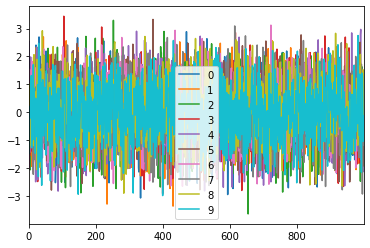

In [12]:
signals.swapaxes(0,1).plot()

In [34]:
np.zeros((10,1000))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# generate spikes

## (1) all cells same spiking

In [92]:

# all cells have one spike
spikes = np.zeros((10,1000))

for r in spikes:
    s = int(np.random.normal(600,10))
    #s = [int(np.random.normal(600,10)) for r in range(2)] # multiple spikes 
    r[s] = 1


In [310]:
np.linspace(50,950,10)

array([ 50., 150., 250., 350., 450., 550., 650., 750., 850., 950.])

In [328]:
num_cells=1
spikes = np.zeros((num_cells, 1000)).astype(int)
spikes[0][np.linspace(50,950,10,dtype='int')] = 1

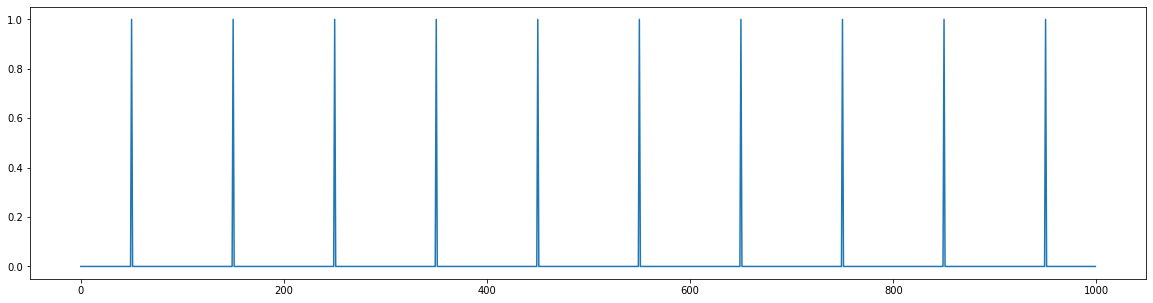

In [345]:
plt.subplots(1,figsize=(20,5))
plt.plot(np.sum(spikes,axis=0))

# test plot spikes - all cells same spiking

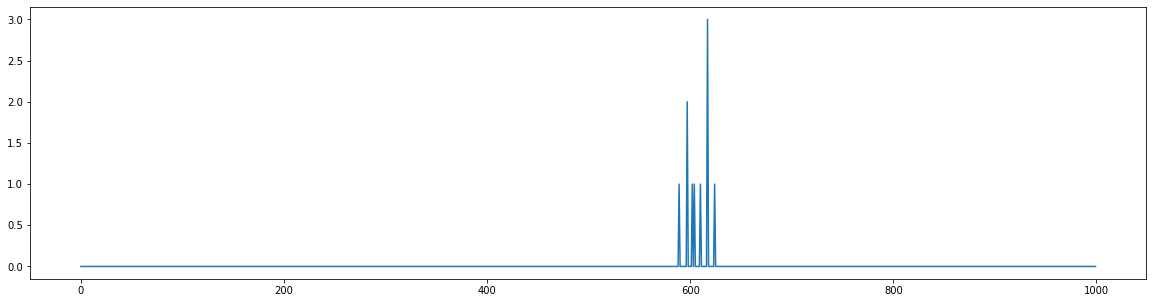

In [93]:
# for all one spikes
plt.subplots(1,figsize=(20,5))
plt.plot(np.sum(spikes,axis=0))

# Mod OASIS

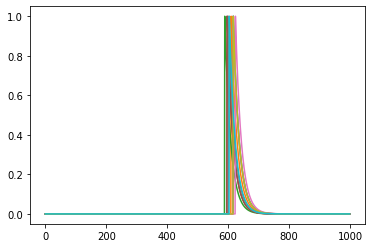

In [146]:
Y,true_ca = gen_data2(spikes,g=[.95])
plt.plot(true_ca.T)

In [114]:



def gen_data2(spikes,g=[.95], sn=.1, b=0):
    """
    Generate data from homogenous Poisson Process
    Parameters
    ----------
    g : array, shape (p,), optional, default=[.95]
        Parameter(s) of the AR(p) process that models the fluorescence impulse response.
    sn : float, optional, default .3
        Noise standard deviation.
    T : int, optional, default 3000
        Duration.
    framerate : int, optional, default 30
        Frame rate.
    firerate : int, optional, default .5
        Neural firing rate.
    b : int, optional, default 0
        Baseline.
    N : int, optional, default 20
        Number of generated traces.
    seed : int, optional, default 13
        Seed of random number generator.
    Returns
    -------
    y : array, shape (T,)
        Noisy fluorescence data.
    c : array, shape (T,)
        Calcium traces (without sn).
    s : array, shape (T,)
        Spike trains.
    """
    
    N,T = spikes.shape
    truth = spikes.astype(float)
    
    for i in range(2, T):
        if len(g) == 2:
            truth[:, i] += g[0] * truth[:, i - 1] + g[1] * truth[:, i - 2]
        else:
            truth[:, i] += g[0] * truth[:, i - 1]
    Y = b + truth + sn * np.random.randn(N, T)
    return Y, truth


# TEST: OASIS gen data

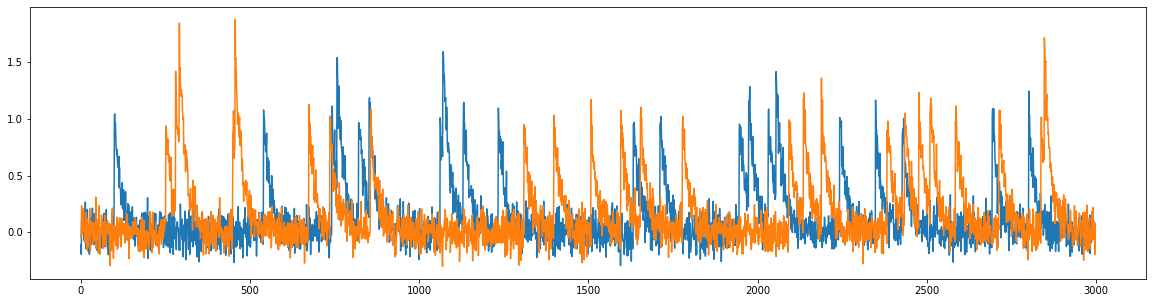

In [84]:


Y,true_c,true_s = gen_data(N=2,sn=.1, b=0, seed=0,firerate=.2)

plt.subplots(1,figsize=(20,5))
plt.plot(Y.T)

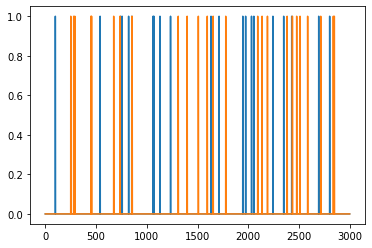

In [90]:
plt.plot(true_s.astype(float).T)

In [75]:
def gen_data(g=[.95], sn=.3, T=3000, framerate=30, firerate=.5, b=0, N=20, seed=13):
    """
    Generate data from homogenous Poisson Process
    Parameters
    ----------
    g : array, shape (p,), optional, default=[.95]
        Parameter(s) of the AR(p) process that models the fluorescence impulse response.
    sn : float, optional, default .3
        Noise standard deviation.
    T : int, optional, default 3000
        Duration.
    framerate : int, optional, default 30
        Frame rate.
    firerate : int, optional, default .5
        Neural firing rate.
    b : int, optional, default 0
        Baseline.
    N : int, optional, default 20
        Number of generated traces.
    seed : int, optional, default 13
        Seed of random number generator.
    Returns
    -------
    y : array, shape (T,)
        Noisy fluorescence data.
    c : array, shape (T,)
        Calcium traces (without sn).
    s : array, shape (T,)
        Spike trains.
    """

    np.random.seed(seed)
    Y = np.zeros((N, T))
    trueSpikes = np.random.rand(N, T) < firerate / float(framerate)
    truth = trueSpikes.astype(float)
    for i in range(2, T):
        if len(g) == 2:
            truth[:, i] += g[0] * truth[:, i - 1] + g[1] * truth[:, i - 2]
        else:
            truth[:, i] += g[0] * truth[:, i - 1]
    Y = b + truth + sn * np.random.randn(N, T)
    return Y, truth, trueSpikes

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# TEST PLACE CELL FUNCTIONS

In [363]:
pos2[150]

1.5015015015015014

In [378]:
pos2 = np.linspace(0,10,1000) # make position function line (cumlative position, each lap is a whole numer) 


nROIs, nFrames = spikes.shape
frames_to_include = np.arange(nFrames)
n_position_bins=20

position_new, init_counts, bins = binned_positions(pos2, frames_to_include,
                                                   n_position_bins)

In [369]:
init_counts

array([51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 49])

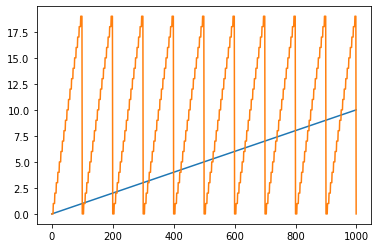

In [365]:
# check that new positions good
plt.plot(pos2)
plt.plot(position_new)

In [379]:
true_values, true_values_squared, true_counts = \
        find_truth(spikes, position_new, init_counts, frames_to_include,
                   n_position_bins, bins, return_square=True)

0 [  0   1   2   3   4 100 101 102 103 104 200 201 202 203 204 300 301 302
 303 304 400 401 402 403 404 500 501 502 503 504 600 601 602 603 604 700
 701 702 703 704 800 801 802 803 804 900 901 902 903 904 999] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 [  5   6   7   8   9 105 106 107 108 109 205 206 207 208 209 305 306 307
 308 309 405 406 407 408 409 505 506 507 508 509 605 606 607 608 609 705
 706 707 708 709 805 806 807 808 809 905 906 907 908 909] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
2 [ 10  11  12  13  14 110 111 112 113 114 210 211 212 213 214 310 311 312
 313 314 410 411 412 413 414 510 511 512 513 514 610 611 612 613 614 710
 711 712 713 714 810 811 812 813 814 910 911 912 913 914] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
3 [ 15  16  17  18  19 115 116 117 118 119 215 216 217 218 219 315 

In [ ]:
from multiprocessing import Pool
n_processes=1
n_bootstraps=1000
bootstrap_values, bootstrap_counts = _shuffle_bin_values(
        spikes, position_new, init_counts, frames_to_include,
        n_processes=n_processes, n_bootstraps=n_bootstraps,
        n_position_bins=n_position_bins, bins=bins,
        shuffle_method='circular')

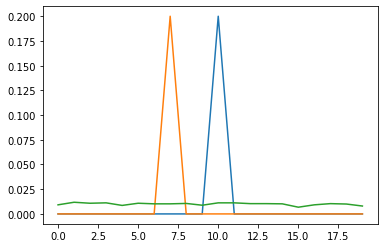

In [481]:
true_tc = true_values / true_counts
bootstrap_tc = bootstrap_values / bootstrap_counts

plt.plot(true_tc.T)
plt.plot(bootstrap_tc[0,:,6]) # single bootstrap
plt.plot(bootstrap_tc[0].mean(axis=1))

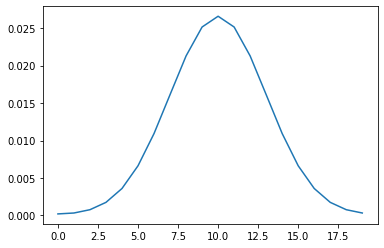

In [491]:
smooth_length=3
true_tc_smooth  = smooth_tuning_curves(true_tc, smooth_length=smooth_length,
                                              nan_norm=False, axis=1)



plt.plot(true_tc_smooth.T)

## Plot checks

## functions

In [413]:
from collections import Counter
import itertools as it

def binned_positions(absolute_position, frames_to_include, n_position_bins,
                     lap_threshold=0.2):
    """Calculate the binned positions for each cycle

    Returns
    -------
    position:
        position at imaging sampling rate
    counts:
        Counter object giving total occupancy at each bin

    """
    absolute_position = absolute_position[frames_to_include] # MJD: check if this is the right pos format

    laps = absolute_position.astype(int)
    n_laps = float(laps[-1] + 1)
    position = ((absolute_position % 1) * n_position_bins).astype(int)

    # Exclude position bins that appear in fewer than lap_threshold laps
    laps_per_bin = []
    for bin in range(n_position_bins):
        # Frames in which this bin was occupied
        idx = np.where(position == bin)[0]
        # Set of laps on which this bin was occupied
        bin_laps = set(laps[idx])
        # Total fraction of laps on which this bin was observed
        laps_per_bin.append(len(bin_laps) / n_laps)

    good_bins = [i for i, bin in enumerate(laps_per_bin)
                 if bin >= lap_threshold]
    # good_bin_frames = [i for i, bin in enumerate(position) if bin in good_bins]

    # position[bad_bin_frames] = np.nan
    # laps = [lap for i, lap in enumerate(laps) if i not in bad_bin_frames]

    counts = Counter(position)

    counts = np.array([counts[x] for x in range(n_position_bins)])

    return position, counts, good_bins

In [402]:
def find_truth(spikes, position, init_counts,
               frames_to_include, n_position_bins, bins=None,
               return_square=False):
    """
    Returns
    -------
    true_values :
        spikes per position bin. Dims=(nROis, nBins)
    true_counts :
        Number of observation per position bin

    """

    nROIs = spikes.shape[0]

    # TODO Shouldn't these be indexed by cycle?
    true_values = np.zeros((nROIs, n_position_bins))
    true_values_squared = np.zeros((nROIs, n_position_bins))
    true_counts = np.zeros((nROIs, n_position_bins))

    for roi_idx, roi_spikes in zip(it.count(), spikes):

        v = generate_tuning_curve(
            spikes=spikes[roi_idx, frames_to_include],
            position=position,
            bins=bins,
            n_position_bins=n_position_bins,
            return_square=return_square)

        if return_square:
            v, v2 = v
            true_values_squared[roi_idx] += v2

        true_values[roi_idx] += v

        true_counts[roi_idx] = init_counts

        # Don't count position observations where signal was NaN
        #print("removed nan code") #MJD EDIT
        #nan_idx = np.where(np.isnan(spikes[roi_idx, frames_to_include]))[0]
        #true_counts[roi_idx, position[nan_idx]] -= 1

    if return_square:
        return true_values, true_values_squared, true_counts

    return true_values, true_counts


def generate_tuning_curve(spikes, n_position_bins, position,
                          bins=None, return_square=False):

    if bins is None:
        bad_bins = []
    else:
        bad_bins = [x for x in range(n_position_bins) if x not in bins]

    values = np.zeros(n_position_bins)
    values_squared = np.zeros(n_position_bins)

    for bin in range(n_position_bins):
        idx = np.where(position == bin)[0]
        values[bin] += np.sum(np.nan_to_num(spikes[idx]))

        if return_square:
            values_squared[bin] += np.sum(np.nan_to_num(spikes[idx]**2))

    values[bad_bins] = np.nan

    if return_square:
        values_squared[bad_bins] = np.nan
        return values, values_squared

    return values


In [484]:
from scipy.ndimage.filters import gaussian_filter1d
def circular_shuffle(spikes, position, bins):

    shuffle = np.empty(spikes.shape)
    # Remove spike time-points in bad position bins
    # So that we only shuffle across valid position bins
    good_idx = np.where(list(map(lambda x: x in bins, position)))[0] # MJD EDIT: MEGA Python3 change, wrap map in list
    bad_idx = [i for i in range(len(position)) if i not in good_idx]

    good_spikes = spikes[:, good_idx]
    good_shuffle = np.empty(good_spikes.shape)

    pivot = np.random.randint(good_spikes.shape[1])

    good_shuffle = np.hstack([good_spikes[:, pivot:],
                              good_spikes[:, :pivot]])

    shuffle[:, good_idx] = good_shuffle
    shuffle[:, bad_idx] = np.nan  # This isn't strictly necessary...

    return shuffle


def _shuffler(inputs):

    (shuffle_method, spikes, position, init_counts,
        frames_to_include, n_position_bins, bins) = inputs

    # TODO add option to shuffle by lap?
    if shuffle_method == 'circular':

        shuffle = np.full(spikes.shape, np.nan)
        # Only pass in running related intervals of spike signal
        shuffle[:, frames_to_include] = \
            circular_shuffle(spikes[:, frames_to_include], position, bins)
        #print(shuffle)

    shuffle_values, shuffle_counts = find_truth(shuffle, position, init_counts,
                                                frames_to_include,
                                                n_position_bins, bins,
                                                return_square=False)

    return shuffle_values, shuffle_counts


def _shuffle_bin_values(spikes, position, init_counts, frames_to_include,
                        n_processes, n_bootstraps, n_position_bins, bins,
                        shuffle_method='circular'):

    nROIs = spikes.shape[0]

    inputs = (shuffle_method, spikes, position, init_counts,
              frames_to_include, n_position_bins, bins)

    if n_processes > 1:
        pool = Pool(processes=n_processes)
        chunksize = 1 + n_bootstraps / n_processes
        map_generator = pool.imap_unordered(
            _shuffler, it.repeat(inputs, n_bootstraps), chunksize=chunksize)
    else:
        map_generator = map(_shuffler, it.repeat(inputs, n_bootstraps))

    bootstrap_values = np.empty((nROIs, n_position_bins, n_bootstraps))
    bootstrap_counts = np.empty((nROIs, n_position_bins, n_bootstraps))

    bootstrap_idx = 0

    for values, counts in map_generator:
        bootstrap_values[:, :, bootstrap_idx] = values
        bootstrap_counts[:, :, bootstrap_idx] = counts
        bootstrap_idx += 1

    if n_processes > 1:
        pool.close()
        pool.join()

    return bootstrap_values, bootstrap_counts




def smooth_tuning_curves(tuning_curves, smooth_length=3, nan_norm=True, axis=-1):

    # mean_zeroed = np.array(tuning_curves)
    # mean_zeroed[np.isnan(tuning_curves)] = 0
    mean_zeroed = np.nan_to_num(tuning_curves)
    gaus_mean = gaussian_filter1d(mean_zeroed, smooth_length, mode='wrap', axis=axis)

    if nan_norm:
        isfinite = np.isfinite(tuning_curves).astype(float)
        sm_isfinite = gaussian_filter1d(isfinite, smooth_length, mode='wrap', axis=axis)
        return gaus_mean / sm_isfinite
    else:
        return gaus_mean